### fault lines from BGS via DigiMap

In [1]:
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family']=['monospace']

In [3]:
faults = pd.concat([gpd.read_file(f) for f in glob('Download_onshore_250k_faults/bgs-250k_5231607/*/*.shp')])

### railways from osm

In [4]:
from osmnx import features_from_bbox, geocode_to_gdf

In [5]:
aoi = geocode_to_gdf(['Scotland, UK'])
aoi_osgb = aoi.to_crs(faults.crs) # reproject to same crs as faults
west,south,east,north = aoi.total_bounds

# clip faults to AOI
faults_aoi = faults.loc[faults['FEATURE'] != '250k_Coastline_OS'].clip(aoi_osgb)

In [6]:
railways = features_from_bbox(north=north,
                             south=south,
                             east=east,
                             west=west,
                             tags={'railway':'rail'}).reset_index()

In [7]:
# reproject and clip to AOI, filter out geometries that aren't linestrings
railways_aoi = railways.to_crs(faults.crs).clip(aoi_osgb)
railways_aoi = railways_aoi.loc[railways_aoi.geom_type=='LineString']

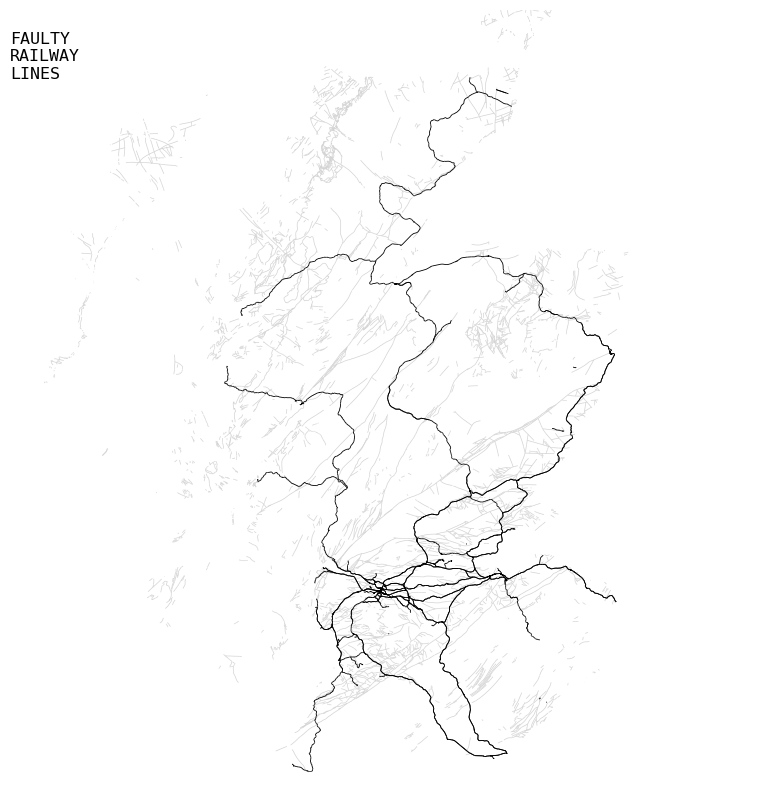

In [12]:
# plot
minx,miny,maxx,maxy = railways_aoi.total_bounds

fig,ax=plt.subplots(figsize=[10,10])

faults_aoi[faults_aoi['FEATURE'] !='250k_Coastline_OS'].plot(ax=ax,color='lightgrey', linewidth=0.5)
railways_aoi.plot(ax=ax,color='k',linewidth=0.6)

ax.set_ylim(miny-5000,maxy+40000)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('FAULTY\nRAILWAY\nLINES', loc='left', y=0.9)

fig.savefig('day2.png')